<a href="https://colab.research.google.com/github/MuthamaFrancs/model_classification/blob/main/Clasiification_of_Models_CS_DA02_25017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FRANCIS MUSAU**

**CS-DA02-25017**

**CLASSIFCATION OF MODELS**


> The Wine dataset is commonly used for benchmarking classification algorithms, representing how models can differentiate between similar classes based on chemical composition.


## Libraries Import

In [15]:
#importing libraries for model classification
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler



## Loading Data Set

In [4]:
#loading the dataset
wine = load_wine()
x=pd.DataFrame(wine.data, columns=wine.feature_names)
y=pd.Series(wine.target, name='target')

print("Shape of data:", x.shape)
x.head()
print(wine.DESCR)

Shape of data: (178, 13)
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                   

## Class Distribution Check

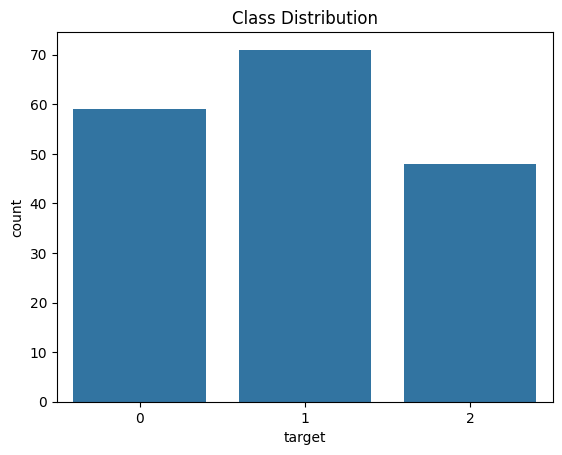

In [5]:
#class distibution check
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

## EDA

False


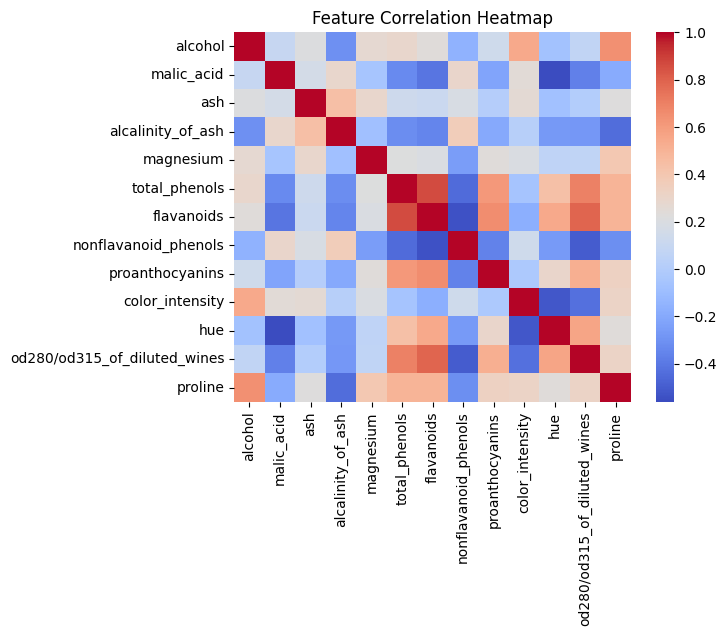

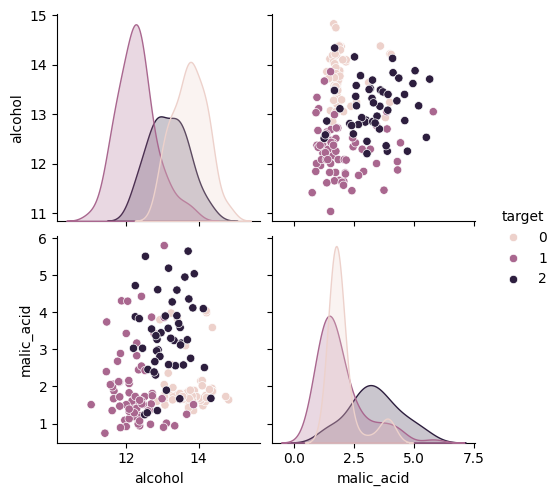

In [9]:
#Exploratory Data Analysis - checking missing values, correlations, visualizing the data
print(x.isnull().sum().any())  # Check missing Vls
sns.heatmap(x.corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

sns.pairplot(pd.concat([x[['alcohol', 'malic_acid']], y], axis=1), hue='target')
plt.show()


## Data Preparation


In [16]:
#Data preparation
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)


## Model BUilding and Results Display

Here, I build the models using a loop where I trained the models based on the wine data then checked the accuracy score storing the values for each model  in variable acc.

Then for each model I appended the name and it's accuracy score which I used to evaluate the 6 models


Logistic Regression Results
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      0.95      0.98        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Accuracy: 0.9814814814814815

Decision Tree Results
              precision    recall  f1-score   support

     class_0       0.95      0.95      0.95        19
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54

Accuracy: 0.9629629629629629

Random Forest Results
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00       

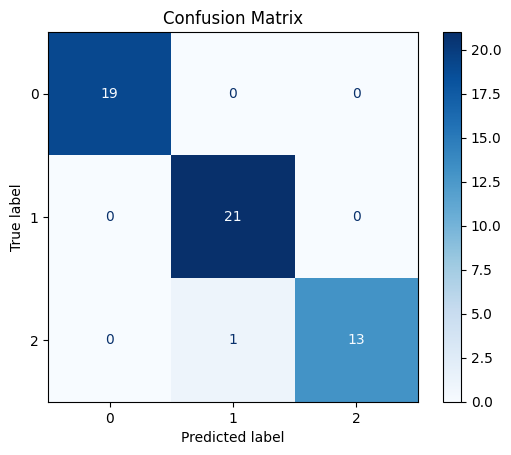

In [19]:
#model building - looping through all the 6 models


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='rbf', random_state=42)
}

results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc})

    print(f"\n{name} Results")
    print(classification_report(y_test, y_pred, target_names=wine.target_names))
    print(f"Accuracy: {acc}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()




# Evaluating Models

The Random Forest classifier achieved the highest accuracy and F1-score while models like Logistic Regression and KNN performed slightly lower


